# Environment Setup

In [13]:
#!pip install opencv-python,
#!pip install stable-baselines3[extra]

In [14]:
# For screen capture
from mss import mss
# For sending commands
import pydirectinput
# For frame preprocessing
import cv2
# For array transformations
import numpy as np
# For plotting frames
from matplotlib import pyplot as plt
# For slowing down game
import time
# Bese Environment components
from gym import Env
from gym.spaces import Box, Discrete

In [15]:
class Flappy_Bird(Env):
    
    def __init__(self):
        super().__init__()
        # Specify observation space and action space
        self.observation_space = Box(low=0, high=255, shape=(1,80,80), dtype=np.uint8)
        self.action_space = Discrete(2)
        # Capture game frames
        self.cap = mss()
        self.game_location = {'top': 200, 'left': 640, 'width': 420, 'height': 600}
        self.done_location = {'top': 360, 'left': 760, 'width': 1, 'height': 1}
        
    def step(self, action):
        # Action
        if action == 0:
            # Jump
            pydirectinput.click(x=750, y=670)
        else:
            # Do nothink
            time.sleep(0.18)

        # Checking if game is done
        done, done_cap = self.get_done() 
        # Getting observation
        observation = self.get_observation()
        reward = 1 
        info = {}
        return observation, reward, done, info
    
    def reset(self):
        # Reseting game
        time.sleep(2)
        for _ in range(3):
            time.sleep(0.08)
            pydirectinput.click(x=750, y=670)
        return self.get_observation()
        
    def render(self):
        # Rendering
        cv2.imshow('Game', self.current_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            self.close()
    
    def get_observation(self):
        # Frame preprocessing
        raw = np.array(self.cap.grab(self.game_location))[:,:,:3].astype(np.uint8)
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (80,80))
        channel = np.reshape(resized, (1,80,80))
        return channel
    
    def get_done(self):
        # Has game ended
        done_cap = np.array(self.cap.grab(self.done_location))
        done=False
        if 700 < np.sum(done_cap) < 720 :
            done = True
            
        return done, done_cap
    
    def close(self):
        # Closing env
        cv2.destroyAllWindows()

# Testing Environment

In [18]:
# Creating environment
env = Flappy_Bird()

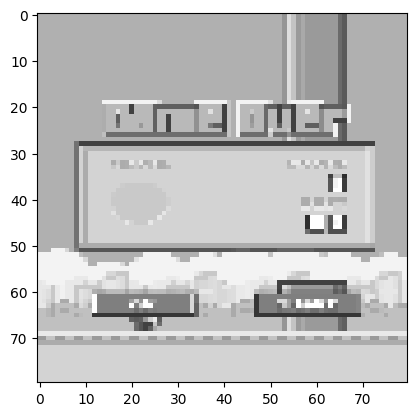

In [19]:
# Getting observation
obs = env.get_observation()
# Plotting observation
plt.imshow(cv2.cvtColor(obs[0], cv2.COLOR_GRAY2BGR));

Is game done?: True


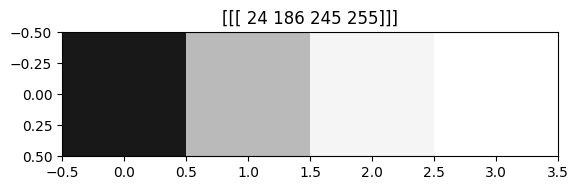

In [20]:
# Checking if game has ended and what rgb values are condition for ending game
done, done_cap = env.get_done()

print("Is game done?:",done)
plt.title(f"{done_cap}")
plt.imshow(cv2.cvtColor(done_cap[0], cv2.COLOR_GRAY2BGR));
plt.show()

In [10]:
# Games with random action
for episode in range(4): 
    obs = env.reset()
    done = False
    total_reward = 0
    
    while not done: 
        action = env.action_space.sample()
        print(action, end="-")
        obs, reward, done, info =  env.step(action)
        total_reward += reward
        
    print(f'Total Reward for episode {episode} is {total_reward}') 

1-0-1-0-0-0-0-0-0-Total Reward for episode 0 is 9
0-0-1-1-1-0-1-1-1-0-1-0-Total Reward for episode 1 is 12
0-1-0-1-0-1-0-0-0-1-1-Total Reward for episode 2 is 11
1-1-1-0-1-1-0-1-0-0-Total Reward for episode 3 is 10


In [27]:
# Checkign for errors in environment
from stable_baselines3.common import env_checker
print(env_checker.check_env(env))

None
